In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("C:\\Users\\Apoorv\\Downloads\\data-c.csv")
data

,Statement,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4844,Net sales of the Paper segment decreased to EU...,negative


## Importing libraries to vectorize the textual data

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 4846):
  review = re.sub('[^a-zA-Z]', ' ', data['Statement'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Apoorv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
corpus

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn e

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data["Sentiment"]

In [34]:
X,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 0        neutral
 1        neutral
 2       negative
 3       positive
 4       positive
           ...   
 4841    negative
 4842     neutral
 4843    negative
 4844    negative
 4845    negative
 Name: Sentiment, Length: 4846, dtype: object)

In [35]:
y = y.map({'positive': 2, 'neutral':1, 'negative':0})
y

0       1
1       1
2       0
3       2
4       2
       ..
4841    0
4842    1
4843    0
4844    0
4845    0
Name: Sentiment, Length: 4846, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 365)

## Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2,
       1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0,
       1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2,

In [39]:
y_test = y_test.to_numpy()

In [40]:
Results = pd.DataFrame()
Results['Actual'] = y_test
Results['Predicted'] = y_pred
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(Results)

     Actual  Predicted
0         1          1
1         0          1
2         0          0
3         1          2
4         1          0
5         1          2
6         1          1
7         1          1
8         0          0
9         1          1
10        1          2
11        0          0
12        1          1
13        2          2
14        1          2
15        2          2
16        0          2
17        1          2
18        1          1
19        1          0
20        1          1
21        1          2
22        2          0
23        1          2
24        0          2
25        2          2
26        1          2
27        1          0
28        1          2
29        1          1
30        1          2
31        2          1
32        1          2
33        2          0
34        1          2
35        1          1
36        1          2
37        2          2
38        1          2
39        1          1
40        1          2
41        1          0
42        1

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 62  13  41]
 [113 208 268]
 [ 83  40 142]]


0.4247422680412371

## SVC Classifier

In [42]:
from sklearn.svm import SVC
classifier_1 = SVC()
classifier_1.fit(X_train, y_train)

SVC()

In [43]:
y_pred = classifier_1.predict(X_test)
y_pred

array([1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1,

In [44]:
Results = pd.DataFrame()
Results['Actual'] = y_test
Results['Predicted'] = y_pred
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(Results)

     Actual  Predicted
0         1          1
1         0          1
2         0          2
3         1          1
4         1          2
5         1          1
6         1          1
7         1          1
8         0          0
9         1          1
10        1          1
11        0          2
12        1          1
13        2          2
14        1          1
15        2          2
16        0          1
17        1          1
18        1          1
19        1          0
20        1          1
21        1          1
22        2          2
23        1          1
24        0          2
25        2          2
26        1          1
27        1          1
28        1          1
29        1          1
30        1          1
31        2          2
32        1          1
33        2          2
34        1          1
35        1          1
36        1          1
37        2          1
38        1          1
39        1          1
40        1          1
41        1          1
42        1

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 38  58  20]
 [  5 556  28]
 [ 13 141 111]]


0.7268041237113402

In [46]:
# Naive Bayes Classifier gives a very poor accuracy of 42.47%
# SVC Classifier gives an accuracy of 72.68%

(array([ 604.,    0.,    0.,    0.,    0., 2879.,    0.,    0.,    0.,
        1363.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

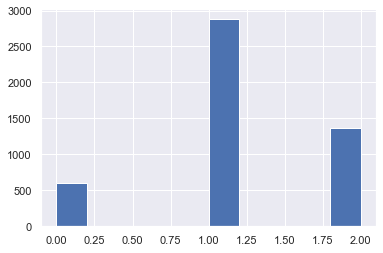

In [47]:
plt.hist(y)

(array([ 56.,   0.,   0.,   0.,   0., 755.,   0.,   0.,   0., 159.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

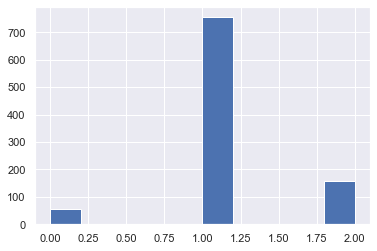

In [48]:
plt.hist(y_pred)